# Load KBase

In [1]:
# define the environment path 
import os
local_cobrakbase_path = os.path.join('C:', 'Users', 'Andrew Freiburger','Documents','Argonne','cobrakbase')
os.environ["HOME"] = local_cobrakbase_path

# import the KBase
import cobrakbase
with open("C:/Users/Andrew Freiburger/Documents/Argonne/kbase_token.txt") as token_file:
    kbase_api = cobrakbase.KBaseAPI(token_file.readline())

# prevent excessive warnings
from time import process_time
import warnings
warnings.filterwarnings(action='once')
%run ../../../modelseedpy/community/mssmetana.py

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


cobrakbase 0.2.8


# test community pairs

# "+" interactions

## YR343 on CF142

In [2]:
# from cobra.medium import minimal_medium
# media = minimal_medium(YR343, minimize_components=True).to_dict()

In [3]:
# print(media)
# for cpd in media:
#     print(cpd)

In [2]:
# load the pair
YR343 = kbase_api.get_from_ws("Pantoea_YR343_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
YR343_CF142_models = [YR343, CF142]
YR343_CF142_model = kbase_api.get_from_ws("YR343-CF142", 114731)

In [3]:
# test the pair
start_time = process_time()
try:
    YR343_CF142 = MSSmetana(YR343_CF142_models, YR343_CF142_model)
    YR343_CF142.mro_score()
    YR343_CF142.mip_score(interacting_media=YR343_CF142.media)
    YR343_CF142.mu_score()
    YR343_CF142.mp_score()
    YR343_CF142.sc_score()
    YR343_CF142.smetana_score();
    end_time = process_time()

    print(f"The YR343_CF142 pair has been examined after {(end_time-start_time)/60}.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## YR343 on CF313

In [4]:
# # load the pair
# YR343 = kbase_api.get_from_ws("Pantoea_YR343_pacbio_v2.RAST.fbamodel", 114731)
# CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
# YR343_CF313_models = [YR343, CF313]
# YR343_CF313_model = kbase_api.get_from_ws("YR343-CF313",114731)
                               
# # test the pair
# try:
#     start_time = process_time()
#     YR343_CF313 = MSSmetana(YR343_CF313_models, YR343_CF313_model)
#     YR343_CF313.mro_score()
#     YR343_CF313.mip_score(interacting_media=YR343_CF313.media)
#     YR343_CF313.mu_score()
#     YR343_CF313.mp_score()
#     YR343_CF313.sc_score()
#     YR343_CF313.smetana_score();
#     end_time = process_time()

#     print(f"The YR343_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
# except ObjectiveError as e:
#     print(e)

In [5]:
# load the pair
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
YR343_CF313_models = [YR343, CF313]
YR343_CF313_model = kbase_api.get_from_ws("YR343-CF313",114731)
                               
# test the pair
try:
    start_time = process_time()
    YR343_CF313 = MSSmetana(YR343_CF313_models, YR343_CF313_model)
    YR343_CF313.mro_score()
    YR343_CF313.mip_score(interacting_media=YR343_CF313.media)
    YR343_CF313.mu_score()
    YR343_CF313.mp_score()
    YR343_CF313.sc_score()
    YR343_CF313.smetana_score();
    end_time = process_time()

    print(f"The YR343_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pantoea_YR343_pacbio_v2.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 1.0 (100.00%). This is the percent of nutritional requirements in Pantoea_YR343_pacbio_v2.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (17/17).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Pantoea_YR343_pacbio_v2.RAST.fbamodel) MRO score: 0.8947368421052632 (89.47%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Pantoea_YR343_pacbio_v2.RAST.fbamodel) (17/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'cpd00001_e0': 1.0,
                                           'cpd00007_e0': 1.0,
                                           'cpd00013_e0': 0.68,
                                           'cpd00017_e0': 1.0,
                                           'cpd00023_e0': 1.0,
                                           'cpd00027_e0': 0.07,
                                           'cpd00028_e0': 1.0,
                                           'cpd00030_e0': 1.0,
                                           'cpd00033_e0': 0.01,
                                           'cpd00034_e0': 1.0,
                                           'cpd00036_e0': 0.04,
                                           'cpd00039_e0': 1.0,
                                        

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 732
MP score:			The possible contributions of each member in the member media include:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': ['cpd00092_e0',
                                           'cpd00161_e0',
                                           'cpd00540_e0',
                                           'cpd00029_e0',
                                           'cpd00176_e0',
                                           'cpd00047_e0',
                                           'cpd00001_e0',
                                           'cpd00082_e0',
                                           'cpd00053_e0',
                                           'cpd00065_e0',
                                           'cpd00066_e0',
                                           'cpd00276_e0',
                     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pantoea_YR343_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 59.32},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Pantoea_YR343_pacbio_v2.RAST.fbamodel': 46.89999999999999}}
The YR343_CF313 pair has been examined after 1.5114583333333333 minutes.


## AP49 on BC15

In [6]:
AP49 = kbase_api.get_from_ws("Sphingobium_AP49_pacbio_v2.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
AP49_BC15_models = [AP49,BC15]
AP49_BC15_model = kbase_api.get_from_ws("AP49-BC15", 114731)

try:
    start_time = process_time()
    AP49_BC15 = MSSmetana(AP49_BC15_models, AP49_BC15_model)
    AP49_BC15.mro_score()
    AP49_BC15.mip_score(interacting_media=AP49_BC15.media)
    AP49_BC15.mu_score()
    AP49_BC15.mp_score()
    AP49_BC15.sc_score()
    AP49_BC15.smetana_score()
    end_time = process_time()

    print(f"The AP49_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 3 change(s): {'dictionary_item_removed': [root['EX_cpd00009_e0']], 'values_changed': {"root['EX_cpd00122_e0']": {'new_value': 831.4916327871985, 'old_value': 910.5600622071402}, "root['EX_cpd10515_e0']": {'new_value': 0.06054586058785579, 'old_value': 0.060545860588035794}}}

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.7619047619047619 (76.19%). This is the percent of nutritional requirements in Sphingobium_AP49_pacbio_v2.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (16/21).

The Bacillus_sp._bc15.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.8 (80.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.RA

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 1			1 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00009_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.55,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.13,
                                     'cpd00024_e0': 0.66,
                                     'cpd00027_e0': 0.86,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 1.0,
                                     'cpd00048_e0': 1.0,
                                   

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 705
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00092_e0',
                                     'cpd00159_e0',
                                     'cpd00142_e0',
                                     'cpd00047_e0',
                                     'cpd00001_e0',
                                     'cpd00100_e0',
                                     'cpd00794_e0',
                                     'cpd00065_e0',
                                     'cpd00066_e0',
                                     'cpd00276_e0',
                                     'cpd00067_e0',
                                     'cpd00218_e0',
                                     'cpd00117_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 55.94},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 46.120000000000005}}
The AP49_BC15 pair has been examined after 1.69609375 minutes.


## CF142 on BC15

In [7]:
CF142_BC15_models = [CF142, BC15]
CF142_BC15_model = kbase_api.get_from_ws("CF142-BC15", 114731)

try:
    start_time = process_time()
    CF142_BC15 = MSSmetana(CF142_BC15_models, CF142_BC15_model)
    CF142_BC15.mro_score()
    CF142_BC15.mip_score(interacting_media=CF142_BC15.media)
    CF142_BC15.mu_score()
    CF142_BC15.mp_score()
    CF142_BC15.sc_score()
    CF142_BC15.smetana_score()
    end_time = process_time()

    print(f"The CF142_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## CF402 on CF313

In [8]:
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
CF402_CF313_models = [CF402,CF313]
CF402_CF313_model = kbase_api.get_from_ws("CF402-CF313", 114731)

try:
    start_time = process_time()
    CF402_CF313 = MSSmetana(CF402_CF313_models, CF402_CF313_model)
    CF402_CF313.mro_score()
    CF402_CF313.mip_score(interacting_media=CF402_CF313.media)
    CF402_CF313.mu_score()
    CF402_CF313.mp_score()
    CF402_CF313.sc_score()
    CF402_CF313.smetana_score()
    end_time = process_time()

    print(f"The CF402_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.00026041666666666666 minutes, with 5 change(s): {'dictionary_item_removed': [root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00066_e0'], root['EX_cpd00033_e0'], root['EX_cpd00119_e0']]}

The Duagnella_sp_CF402.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.38636363636363635 (38.64%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (17/44).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.8947368421052632 (89.47%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbamodel) (17/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 5			5 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00066_e0'], root['EX_cpd00033_e0'], root['EX_cpd00119_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Duagnella_sp_CF402.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                      'cpd00018_e0': 1.0,
                                      'cpd00023_e0': 1.0,
                                      'cpd00027_e0': 1.0,
                                      'cpd00028_e0': 1.0,
                                      'cpd00030_e0': 1.0,
                                      'cpd00033_e0': 1.0,
                                      'cpd00034_e0': 1.0,
                                      'cpd00035_e0': 1.0,
                                      'cpd00039_e0': 1.0,
                                      'cpd00041_e0': 1.0,
                                      'cpd0004

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 834
MP score:			The possible contributions of each member in the member media include:

{'Duagnella_sp_CF402.RAST.fbamodel': ['cpd00023_e0',
                                      'cpd00161_e0',
                                      'cpd00041_e0',
                                      'cpd00011_e0',
                                      'cpd00035_e0',
                                      'cpd00060_e0',
                                      'cpd00084_e0',
                                      'cpd00066_e0',
                                      'cpd00129_e0',
                                      'cpd00033_e0',
                                      'cpd00067_e0',
                                      'cpd00001_e0',
                                      'cpd00132_e0',
                            

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 34.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 37.69}}
The CF402_CF313 pair has been examined after 0.6791666666666667 minutes.


## CF402 on BC15

In [2]:
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
CF402_BC15_models = [CF402,BC15]
CF402_BC15_model = kbase_api.get_from_ws("CF402-BC15", 114731)

try:
    start_time = process_time()
    CF402_BC15 = MSSmetana(CF402_BC15_models, CF402_BC15_model)
    CF402_BC15.mro_score()
    CF402_BC15.mip_score(interacting_media=CF402_BC15.media)
    CF402_BC15.mu_score()
    CF402_BC15.mp_score()
    CF402_BC15.sc_score()
    CF402_BC15.smetana_score()
    end_time = process_time()

    print(f"The CF402_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 4 change(s): {'dictionary_item_removed': [root['EX_cpd00039_e0'], root['EX_cpd00218_e0'], root['EX_cpd00066_e0'], root['EX_cpd00035_e0']]}

The Duagnella_sp_CF402.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.4090909090909091 (40.91%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (18/44).

The Bacillus_sp._bc15.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbamodel) (18/20).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 4			4 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00039_e0'], root['EX_cpd00218_e0'], root['EX_cpd00066_e0'], root['EX_cpd00035_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.26,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.02,
                                     'cpd00024_e0': 0.55,
                                     'cpd00027_e0': 0.58,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 0.82,
                   

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 737
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00092_e0',
                                     'cpd00218_e0',
                                     'cpd00009_e0',
                                     'cpd00084_e0',
                                     'cpd00047_e0',
                                     'cpd00142_e0',
                                     'cpd00067_e0',
                                     'cpd00182_e0',
                                     'cpd00041_e0',
                                     'cpd00100_e0',
                                     'cpd00159_e0',
                                     'cpd00075_e0',
                                     'cpd00065_e0',
                                     'cpd

In [12]:
from cobra.medium import minimal_medium
display(sorted(list(minimal_medium(CF402, minimize_components=True).keys())))
display(sorted(list(minimal_medium(BC15, minimize_components=True).keys())))
display(set(list(minimal_medium(BC15, minimize_components=True).keys())) & set(list(minimal_medium(CF402, minimize_components=True).keys())))

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


['EX_cpd00007_e0',
 'EX_cpd00018_e0',
 'EX_cpd00023_e0',
 'EX_cpd00027_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00033_e0',
 'EX_cpd00034_e0',
 'EX_cpd00035_e0',
 'EX_cpd00039_e0',
 'EX_cpd00041_e0',
 'EX_cpd00046_e0',
 'EX_cpd00048_e0',
 'EX_cpd00051_e0',
 'EX_cpd00054_e0',
 'EX_cpd00058_e0',
 'EX_cpd00060_e0',
 'EX_cpd00063_e0',
 'EX_cpd00065_e0',
 'EX_cpd00066_e0',
 'EX_cpd00069_e0',
 'EX_cpd00091_e0',
 'EX_cpd00099_e0',
 'EX_cpd00107_e0',
 'EX_cpd00119_e0',
 'EX_cpd00126_e0',
 'EX_cpd00129_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00161_e0',
 'EX_cpd00184_e0',
 'EX_cpd00205_e0',
 'EX_cpd00215_e0',
 'EX_cpd00218_e0',
 'EX_cpd00220_e0',
 'EX_cpd00239_e0',
 'EX_cpd00254_e0',
 'EX_cpd00322_e0',
 'EX_cpd00381_e0',
 'EX_cpd00393_e0',
 'EX_cpd00644_e0',
 'EX_cpd00654_e0',
 'EX_cpd00793_e0',
 'EX_cpd10516_e0']

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


['EX_cpd00007_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00034_e0',
 'EX_cpd00048_e0',
 'EX_cpd00058_e0',
 'EX_cpd00063_e0',
 'EX_cpd00099_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00205_e0',
 'EX_cpd00220_e0',
 'EX_cpd00254_e0',
 'EX_cpd00322_e0',
 'EX_cpd00355_e0',
 'EX_cpd00393_e0',
 'EX_cpd00654_e0',
 'EX_cpd00793_e0',
 'EX_cpd10516_e0',
 'EX_cpd15603_e0']

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


{'EX_cpd00007_e0',
 'EX_cpd00028_e0',
 'EX_cpd00030_e0',
 'EX_cpd00034_e0',
 'EX_cpd00048_e0',
 'EX_cpd00058_e0',
 'EX_cpd00063_e0',
 'EX_cpd00099_e0',
 'EX_cpd00149_e0',
 'EX_cpd00156_e0',
 'EX_cpd00205_e0',
 'EX_cpd00220_e0',
 'EX_cpd00254_e0',
 'EX_cpd00322_e0',
 'EX_cpd00393_e0',
 'EX_cpd00654_e0',
 'EX_cpd00793_e0',
 'EX_cpd10516_e0'}

# "-" interactions

## GM17 on CF142

In [10]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
CF142 = kbase_api.get_from_ws("Rhizobium_CF142_pacbio_v2.RAST.fbamodel", 114731)
GM17_CF142_models = [GM17,CF142]
GM17_CF142_model = kbase_api.get_from_ws("GM17-CF142", 114731)

try:
    start_time = process_time()
    GM17_CF142 = MSSmetana(GM17_CF142_models, GM17_CF142_model)
    GM17_CF142.mro_score()
    GM17_CF142.mip_score(interacting_media=GM17_CF142.media)
    GM17_CF142.mu_score()
    GM17_CF142.mp_score()
    GM17_CF142.sc_score()
    GM17_CF142.smetana_score()
    end_time = process_time()

    print(f"The GM17_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## GM17 on BC15

In [11]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
BC15 = kbase_api.get_from_ws("Bacillus_sp._bc15.RAST.fbamodel", 114731)
GM17_BC15_models = [GM17,BC15]
GM17_BC15_model = kbase_api.get_from_ws("GM17-BC15", 114731)

try:
    start_time = process_time()
    GM17_BC15 = MSSmetana(GM17_BC15_models, GM17_BC15_model)
    GM17_BC15.mro_score()
    GM17_BC15.mip_score(interacting_media=GM17_BC15.media)
    GM17_BC15.mu_score()
    GM17_BC15.mp_score()
    GM17_BC15.sc_score()
    GM17_BC15.smetana_score()
    end_time = process_time()

    print(f"The GM17_BC15 pair has been examined after {(end_time-start_time)/60} minutes.")
except (ObjectiveError, FeasibilityError) as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Bacillus_sp._bc15.RAST.fbamodel) MRO score: 0.8636363636363636 (86.36%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Bacillus_sp._bc15.RAST.fbamodel) (19/22).

The Bacillus_sp._bc15.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.95 (95.00%). This is the percent of nutritional requirements in Bacillus_sp._bc15.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (19/20).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Bacillus_sp._bc15.RAST.fbamodel': {'cpd00001_e0': 0.55,
                                     'cpd00007_e0': 1.0,
                                     'cpd00017_e0': 1.0,
                                     'cpd00023_e0': 0.13,
                                     'cpd00024_e0': 0.66,
                                     'cpd00027_e0': 0.86,
                                     'cpd00028_e0': 1.0,
                                     'cpd00030_e0': 1.0,
                                     'cpd00033_e0': 1.0,
                                     'cpd00034_e0': 1.0,
                                     'cpd00039_e0': 1.0,
                                     'cpd00041_e0': 1.0,
                                     'cpd00048_e0': 1.0,
                                     'cpd00051_e0': 1.0

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 706
MP score:			The possible contributions of each member in the member media include:

{'Bacillus_sp._bc15.RAST.fbamodel': ['cpd00092_e0',
                                     'cpd00159_e0',
                                     'cpd00142_e0',
                                     'cpd00047_e0',
                                     'cpd00001_e0',
                                     'cpd00100_e0',
                                     'cpd00065_e0',
                                     'cpd00066_e0',
                                     'cpd00276_e0',
                                     'cpd00067_e0',
                                     'cpd00132_e0',
                                     'cpd00117_e0',
                                     'cpd00226_e0',
                                     'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Bacillus_sp._bc15.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 0.0}}

smetana score:

{'Bacillus_sp._bc15.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 54.64999999999999},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Bacillus_sp._bc15.RAST.fbamodel': 48.05999999999999}}
The GM17_BC15 pair has been examined after 2.9520833333333334 minutes.


## CF313 on CF142 

In [12]:
CF313_CF142_models = [CF313,CF142]
CF313_CF142_model = kbase_api.get_from_ws("CF313-CF142", 114731)

try:
    start_time = process_time()
    CF313_CF142 = MSSmetana(CF313_CF142_models, CF313_CF142_model)
    CF313_CF142.mro_score()
    CF313_CF142.mip_score(interacting_media=CF313_CF142.media)
    CF313_CF142.mu_score()
    CF313_CF142.mp_score()
    CF313_CF142.sc_score()
    CF313_CF142.smetana_score()
    end_time = process_time()

    print(f"The CF313_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## AP07 on AP49

In [13]:
AP49 = kbase_api.get_from_ws("Sphingobium_AP49_pacbio_v2.RAST.fbamodel", 114731)
AP07 = kbase_api.get_from_ws("Caulobacter_AP07_pacbio_v2.RAST.fbamodel", 114731)
AP07_AP49_models = [AP07,AP49]
AP07_AP49_model = kbase_api.get_from_ws("AP07-AP49", 114731)

try:
    start_time = process_time()
    AP07_AP49 = MSSmetana(AP07_AP49_models, AP07_AP49_model)
    AP07_AP49.mro_score()
    AP07_AP49.mip_score(interacting_media=AP07_AP49.media)
    AP07_AP49.mu_score()
    AP07_AP49.mp_score()
    AP07_AP49.sc_score()
    AP07_AP49.smetana_score()
    end_time = process_time()

    print(f"The AP07_AP49 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 2 change(s): {'values_changed': {"root['EX_cpd00276_e0']": {'new_value': 980.4736569394054, 'old_value': 1000.0}, "root['EX_cpd10515_e0']": {'new_value': 0.0008418477477126446, 'old_value': 0.0008418477478926434}}}

The Caulobacter_AP07_pacbio_v2.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Caulobacter_AP07_pacbio_v2.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.RAST.fbamodel) (18/20).

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Caulobacter_AP07_pacbio_v2.RAST.fbamodel) MRO score: 0.8571428571428571 (85.71%). This is the percent of nutritional requirements in Sphingobium_AP49_pacbio_v2.RAST.fbamodel that overlap with Caulobacter_AP07_pacbio_v2.RAST.fbamodel) (18/21).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00009_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00023_e0': 0.05,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00033_e0': 0.14,
                                              'cpd00034_e0': 1.0,
                                              'cpd00036_e0': 0.5,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 0.01,
                                              'cpd00048_e0': 1.0,
     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 641
MP score:			The possible contributions of each member in the member media include:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': ['cpd00001_e0',
                                              'cpd00066_e0',
                                              'cpd03279_e0',
                                              'cpd00067_e0',
                                              'cpd00023_e0',
                                              'cpd00412_e0',
                                              'cpd00138_e0',
                                              'cpd00035_e0',
                                              'cpd00036_e0',
                                              'cpd00060_e0',
                                              'cpd00054_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 0.0},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 42.41000000000001},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': 45.120000000000005}}
The AP07_AP49 pair has been examined after 1.1153645833333334 minutes.


## CF313 on BT03

In [14]:
BT03 = kbase_api.get_from_ws("Burkholderia_sp._BT03.RAST.fbamodel", 114731)
CF313 = kbase_api.get_from_ws("Variovorax_CF313_pacbio_v2.RAST.fbamodel",114731)
CF313_BT03_models = [CF313,BT03]
CF313_BT03_model = kbase_api.get_from_ws("CF313-BT03", 114731)

try:
    start_time = process_time()
    CF313_BT03 = MSSmetana(CF313_BT03_models, CF313_BT03_model)
    CF313_BT03.mro_score()
    CF313_BT03.mip_score(interacting_media=CF313_BT03.media)
    CF313_BT03.mu_score()
    CF313_BT03.mp_score()
    CF313_BT03.sc_score()
    CF313_BT03.smetana_score()
    end_time = process_time()

    print(f"The CF313_BT03 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Burkholderia_sp._BT03.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Burkholderia_sp._BT03.RAST.fbamodel) (18/19).

The Burkholderia_sp._BT03.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Burkholderia_sp._BT03.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (18/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                         'cpd00009_e0': 0.23,
                                         'cpd00017_e0': 1.0,
                                         'cpd00023_e0': 0.05,
                                         'cpd00024_e0': 0.05,
                                         'cpd00028_e0': 1.0,
                                         'cpd00030_e0': 1.0,
                                         'cpd00034_e0': 1.0,
                                         'cpd00036_e0': 0.04,
                                         'cpd00039_e0': 1.0,
                                         'cpd00041_e0': 0.04,
                                         'cpd00048_e0': 1.0,
                                         'cpd00051_e0': 1.0,
  

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 112
MP score:			The possible contributions of each member in the member media include:

{'Burkholderia_sp._BT03.RAST.fbamodel': ['cpd00092_e0',
                                         'cpd00159_e0',
                                         'cpd00012_e0',
                                         'cpd00001_e0',
                                         'cpd00053_e0',
                                         'cpd00066_e0',
                                         'cpd00276_e0',
                                         'cpd00067_e0',
                                         'cpd00136_e0',
                                         'cpd00218_e0',
                                         'cpd00226_e0',
                                         'cpd00138_e0',
                                         'cpd

## YR139 on CF142

In [15]:
YR139 = kbase_api.get_from_ws("Streptomyces_YR139_pacbio_v2.RAST.fbamodel", 114731)
YR139_CF142_models = [YR139,CF142]
YR139_CF142_model = kbase_api.get_from_ws("YR139-CF142", 114731)

try:
    start_time = process_time()
    YR139_CF142 = MSSmetana(YR139_CF142_models, YR139_CF142_model)
    YR139_CF142.mro_score()
    YR139_CF142.mip_score(interacting_media=YR139_CF142.media)
    YR139_CF142.mu_score()
    YR139_CF142.mp_score()
    YR139_CF142.sc_score()
    YR139_CF142.smetana_score()
    end_time = process_time()

    print(f"The YR139_CF142 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

The model Rhizobium_CF142_pacbio_v2.RAST.fbamodel possesses an objective value of 0 in complete media, which is incompatible with minimal media computations and hence SMETANA.


## GM17 on AP49

In [16]:
GM17_AP49_models = [GM17,AP49]
GM17_AP49_model = kbase_api.get_from_ws("GM17-AP49", 114731)

try:
    start_time = process_time()
    GM17_AP49 = MSSmetana(GM17_AP49_models, GM17_AP49_model)
    GM17_AP49.mro_score()
    GM17_AP49.mip_score(interacting_media=GM17_AP49.media)
    GM17_AP49.mu_score()
    GM17_AP49.mp_score()
    GM17_AP49.sc_score()
    GM17_AP49.smetana_score()
    end_time = process_time()

    print(f"The GM17_AP49 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 2 change(s): {'values_changed': {"root['EX_cpd10515_e0']": {'new_value': 0.0008418477476973943, 'old_value': 0.0008418477478773931}, "root['EX_cpd00122_e0']": {'new_value': 765.0152347932409, 'old_value': 910.5600622071402}}}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Sphingobium_AP49_pacbio_v2.RAST.fbamodel) MRO score: 0.7727272727272727 (77.27%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Sphingobium_AP49_pacbio_v2.RAST.fbamodel) (17/22).

The Sphingobium_AP49_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.8095238095238095 (80.95%). This is the percent of nutritional requirements in Sphingobium_AP49_pacbio_v2.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.R

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00027_e0': 1.0,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00034_e0': 1.0,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
                                              'cpd00053_e0': 1.0,
                                              'cpd00054_e0': 1.0,
        

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 581
MP score:			The possible contributions of each member in the member media include:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': ['cpd00092_e0',
                                              'cpd00159_e0',
                                              'cpd00142_e0',
                                              'cpd00012_e0',
                                              'cpd00001_e0',
                                              'cpd00100_e0',
                                              'cpd00184_e0',
                                              'cpd00276_e0',
                                              'cpd00067_e0',
                                              'cpd00136_e0',
                                              'cpd00023_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 0.0},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': 49.06999999999999},
 'Sphingobium_AP49_pacbio_v2.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 49.120000000000005}}
The GM17_AP49 pair has been examined after 2.23984375 minutes.


## GM17 on CF313

In [17]:
GM17_CF313_models = [GM17,CF313]
GM17_CF313_model = kbase_api.get_from_ws("GM17-CF313", 114731)

try:
    start_time = process_time()
    GM17_CF313 = MSSmetana(GM17_CF313_models, GM17_CF313_model)
    GM17_CF313.mro_score()
    GM17_CF313.mip_score(interacting_media=GM17_CF313.media)
    GM17_CF313.mu_score()
    GM17_CF313.mp_score()
    GM17_CF313.sc_score()
    GM17_CF313.smetana_score()
    end_time = process_time()

    print(f"The GM17_CF313 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Variovorax_CF313_pacbio_v2.RAST.fbamodel) MRO score: 0.8636363636363636 (86.36%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Variovorax_CF313_pacbio_v2.RAST.fbamodel) (19/22).

The Variovorax_CF313_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 1.0 (100.00%). This is the percent of nutritional requirements in Variovorax_CF313_pacbio_v2.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (19/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00027_e0': 1.0,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00034_e0': 1.0,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 1.0,
                                              'cpd00048_e0': 1.0,
                                              'cpd00051_e0': 1.0,
                                              'cpd00053_e0': 1.0,
                                              'cpd00054_e0': 1.0,
        

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 750
MP score:			The possible contributions of each member in the member media include:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': ['cpd00092_e0',
                                              'cpd00540_e0',
                                              'cpd00159_e0',
                                              'cpd00142_e0',
                                              'cpd00012_e0',
                                              'cpd00001_e0',
                                              'cpd00082_e0',
                                              'cpd00053_e0',
                                              'cpd00066_e0',
                                              'cpd00276_e0',
                                              'cpd00067_e0',
                                              

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 0.0},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': None}

smetana score:

{'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Variovorax_CF313_pacbio_v2.RAST.fbamodel': 47.51},
 'Variovorax_CF313_pacbio_v2.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 44.58}}
The GM17_CF313 pair has been examined after 2.3901041666666667 minutes.


## GM17 on AP07

In [18]:
GM17_AP07_models = [GM17,AP07]
GM17_AP07_model = kbase_api.get_from_ws("GM17-AP07", 114731)

try:
    start_time = process_time()
    GM17_AP07 = MSSmetana(GM17_AP07_models, GM17_AP07_model)
    GM17_AP07.mro_score()
    GM17_AP07.mip_score(interacting_media=GM17_AP07.media)
    GM17_AP07.mu_score()
    GM17_AP07.mp_score()
    GM17_AP07.sc_score()
    GM17_AP07.smetana_score()
    end_time = process_time()

    print(f"The GM17_AP07 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Caulobacter_AP07_pacbio_v2.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Caulobacter_AP07_pacbio_v2.RAST.fbamodel) (18/22).

The Caulobacter_AP07_pacbio_v2.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.9 (90.00%). This is the percent of nutritional requirements in Caulobacter_AP07_pacbio_v2.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/20).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                              'cpd00009_e0': 1.0,
                                              'cpd00017_e0': 1.0,
                                              'cpd00023_e0': 0.05,
                                              'cpd00028_e0': 1.0,
                                              'cpd00030_e0': 1.0,
                                              'cpd00033_e0': 0.14,
                                              'cpd00034_e0': 1.0,
                                              'cpd00036_e0': 0.5,
                                              'cpd00039_e0': 1.0,
                                              'cpd00041_e0': 0.01,
                                              'cpd00048_e0': 1.0,
     

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 710
MP score:			The possible contributions of each member in the member media include:

{'Caulobacter_AP07_pacbio_v2.RAST.fbamodel': ['cpd00092_e0',
                                              'cpd00161_e0',
                                              'cpd00540_e0',
                                              'cpd00012_e0',
                                              'cpd00001_e0',
                                              'cpd00082_e0',
                                              'cpd00066_e0',
                                              'cpd03279_e0',
                                              'cpd00067_e0',
                                              'cpd00023_e0',
                                              'cpd00218_e0',
                                              

## GM17 on CF402

In [19]:
GM17 = kbase_api.get_from_ws("Pseudomonas_GM17_pacbio_v2.RAST.fbamodel", 114731)
CF402 = kbase_api.get_from_ws("Duagnella_sp_CF402.RAST.fbamodel", 114731)
GM17_CF402_models = [GM17,CF402]
GM17_CF402_model = kbase_api.get_from_ws("GM17-CF402", 114731)

try:
    start_time = process_time()
    GM17_CF402 = MSSmetana(GM17_CF402_models, GM17_CF402_model)
    GM17_CF402.mro_score()
    GM17_CF402.mip_score(interacting_media=GM17_CF402.media)
    GM17_CF402.mu_score()
    GM17_CF402.mp_score()
    GM17_CF402.sc_score()
    GM17_CF402.smetana_score()
    end_time = process_time()

    print(f"The GM17_CF402 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 5 change(s): {'dictionary_item_removed': [root['EX_cpd00104_e0'], root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00066_e0']], 'values_changed': {"root['EX_cpd00060_e0']": {'new_value': 4.727825818491544, 'old_value': 20.23530185113168}}}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Duagnella_sp_CF402.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Duagnella_sp_CF402.RAST.fbamodel) (18/22).

The Duagnella_sp_CF402.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.4090909090909091 (40.91%). This is the percent of nutritional requirements in Duagnella_sp_CF402.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fba

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 4			4 required compound(s) can be sourced via syntrophy:
[root['EX_cpd00104_e0'], root['EX_cpd00218_e0'], root['EX_cpd00039_e0'], root['EX_cpd00066_e0']]

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Duagnella_sp_CF402.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                      'cpd00018_e0': 1.0,
                                      'cpd00023_e0': 1.0,
                                      'cpd00027_e0': 1.0,
                                      'cpd00028_e0': 1.0,
                                      'cpd00030_e0': 1.0,
                                      'cpd00033_e0': 1.0,
                                      'cpd00034_e0': 1.0,
                                      'cpd00035_e0': 1.0,
                                      'cpd00039_e0': 1.0,
                                      'cpd00041_e0': 1.0,
                                      'cpd00046_e0': 1.0,
            

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 36
MP score:			The possible contributions of each member in the member media include:

{'Duagnella_sp_CF402.RAST.fbamodel': ['cpd00023_e0',
                                      'cpd00041_e0',
                                      'cpd00132_e0',
                                      'cpd00218_e0',
                                      'cpd00035_e0',
                                      'cpd00060_e0',
                                      'cpd00053_e0',
                                      'cpd00084_e0',
                                      'cpd00066_e0',
                                      'cpd00129_e0',
                                      'cpd00033_e0',
                                      'cpd00067_e0',
                                      'cpd00161_e0',
                             

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Duagnella_sp_CF402.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 0.0}}

smetana score:

{'Duagnella_sp_CF402.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 32.0},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Duagnella_sp_CF402.RAST.fbamodel': 42.07}}
The GM17_CF402 pair has been examined after 1.86484375 minutes.


## GM17 on BT03

In [20]:
GM17_BT03_models = [GM17,BT03]
GM17_BT03_model = kbase_api.get_from_ws("GM17-BT03", 114731)

try:
    start_time = process_time()
    GM17_BT03 = MSSmetana(GM17_BT03_models, GM17_BT03_model)
    GM17_BT03.mro_score()
    GM17_BT03.mip_score(interacting_media=GM17_BT03.media)
    GM17_BT03.mu_score()
    GM17_BT03.mp_score()
    GM17_BT03.sc_score()
    GM17_BT03.smetana_score()
    end_time = process_time()

    print(f"The GM17_BT03 pair has been examined after {(end_time-start_time)/60} minutes.")
except ObjectiveError as e:
    print(e)

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
Syntrophic fluxes examined after 0.0 minutes, with 0 change(s): {}

The Pseudomonas_GM17_pacbio_v2.RAST.fbamodel on Burkholderia_sp._BT03.RAST.fbamodel) MRO score: 0.8181818181818182 (81.82%). This is the percent of nutritional requirements in Pseudomonas_GM17_pacbio_v2.RAST.fbamodel that overlap with Burkholderia_sp._BT03.RAST.fbamodel) (18/22).

The Burkholderia_sp._BT03.RAST.fbamodel on Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) MRO score: 0.9473684210526315 (94.74%). This is the percent of nutritional requirements in Burkholderia_sp._BT03.RAST.fbamodel that overlap with Pseudomonas_GM17_pacbio_v2.RAST.fbamodel) (18/19).


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()



MIP score: 0			0 required compound(s) can be sourced via syntrophy:
None

MU score:			The fraction of solutions in which each member is the syntrophic receiver that contain a respective metabolite:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'cpd00007_e0': 1.0,
                                         'cpd00009_e0': 0.23,
                                         'cpd00017_e0': 1.0,
                                         'cpd00023_e0': 0.05,
                                         'cpd00024_e0': 0.05,
                                         'cpd00028_e0': 1.0,
                                         'cpd00030_e0': 1.0,
                                         'cpd00034_e0': 1.0,
                                         'cpd00036_e0': 0.04,
                                         'cpd00039_e0': 1.0,
                                         'cpd00041_e0': 0.04,
                                         'cpd00048_e0': 1.0,
                                         'cpd00051_e0': 1.0,
  

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.


C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()
C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


Community models are too excessive for direct assessment via the JENGA method; thus, the community minimal media is estimated as the combination of member media.
remaining possible_contributions 105
MP score:			The possible contributions of each member in the member media include:

{'Burkholderia_sp._BT03.RAST.fbamodel': ['cpd00092_e0',
                                         'cpd00540_e0',
                                         'cpd00159_e0',
                                         'cpd00142_e0',
                                         'cpd00176_e0',
                                         'cpd00064_e0',
                                         'cpd00001_e0',
                                         'cpd00082_e0',
                                         'cpd00276_e0',
                                         'cpd00067_e0',
                                         'cpd00136_e0',
                                         'cpd00118_e0',
                                         'cpd

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



SC score:			The fraction of community members who syntrophically contribute to each species:

{'Burkholderia_sp._BT03.RAST.fbamodel': None,
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Burkholderia_sp._BT03.RAST.fbamodel': 0.0}}

smetana score:

{'Burkholderia_sp._BT03.RAST.fbamodel': {'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': 46.10999999999999},
 'Pseudomonas_GM17_pacbio_v2.RAST.fbamodel': {'Burkholderia_sp._BT03.RAST.fbamodel': 48.50999999999999}}
The GM17_BT03 pair has been examined after 2.6690104166666666 minutes.


In [21]:
from cobra.medium import minimal_medium
len(minimal_medium(CF402, minimize_components=True))

C:\Users\Andrew Freiburger\AppData\Local\Programs\Python\Python39\lib\site-packages\cobra\medium\minimal_medium.py:112: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  medium = pd.Series()


44

# Statistically process the above results

## MRO scores

### Parsed MRO values

In [ ]:
# from scipy import stats
# posInteractions = [YR343_CF313.mro[0], AP49_BC15.mro[0], YR343_CF313.mro[0], YR343_CF313.mro[0]]
# negInteractions = [0.8636363636363636, 0.9, 0.9473684210526315, 0.7727272727272727, 0.8636363636363636, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8]

# ttest = stats.ttest_ind(posInteractions, negInteractions)
# print(ttest.pvalue)

In [12]:
from scipy import stats
posInteractions = [1, 0.7619047619047619, 0.38636363636363635, 0.36363636363636365]
negInteractions = [0.8636363636363636, 0.9, 0.9473684210526315, 0.7727272727272727, 0.8636363636363636, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.054250055299084145


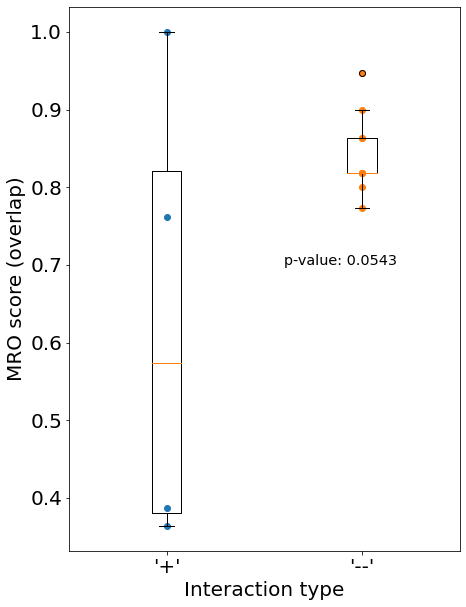

In [13]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MRO score (overlap)")
pyplot.text(1.6,.7, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("parsed MRO comparion.jpg")
# display(fig)
# pyplot.show()

### Averaged MRO values

In [ ]:
from scipy import stats
posInteractions = [0.9444444444444444, 0.7804878048780488, 0.5396825396825397, 0.53125]
negInteractions = [0.9047619047619048, 0.8780487804878049, 0.9473684210526315]
negInteractions2 = [0.8095238095238095, 0.926829268292683, 0.9473684210526315, 0.926829268292683, 0.8095238095238095, 0.5757575757575758, 0.8780487804878049]
posInteractions2 = [0.9444444444444444, 0.7804878048780488, 0.5396825396825397, 0.53125]

ttest = stats.ttest_ind(posInteractions2, negInteractions2)
print(ttest.pvalue)

In [ ]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions2, negInteractions2], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions2), posInteractions2)
pyplot.scatter([2]*len(negInteractions2), negInteractions2)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MRO score (overlap)")
pyplot.text(1.6,.7, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MRO comparion.jpg")
# display(fig)
# pyplot.show()

## MIP scores

In [22]:
from scipy import stats
posInteractions minimal_mediumR343_CF313.mip, AP49_BC15.mip, CF402_CF313.mip, CF402_BC15.mip]
negInteractions = [GM17_BC15.mip, AP07_AP49.mip, CF313_BT03.mip, GM17_AP49.mip, GM17_CF313.mip, GM17_AP07.mip, GM17_CF402.mip, GM17_BT03.mip, CF402_BC15.mip]
# negInteractions2 = [0, 0, 0, 0, 1, 4, 0]
# posInteractions2 = [0, 1, 6, 7]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

0.21048444424537321


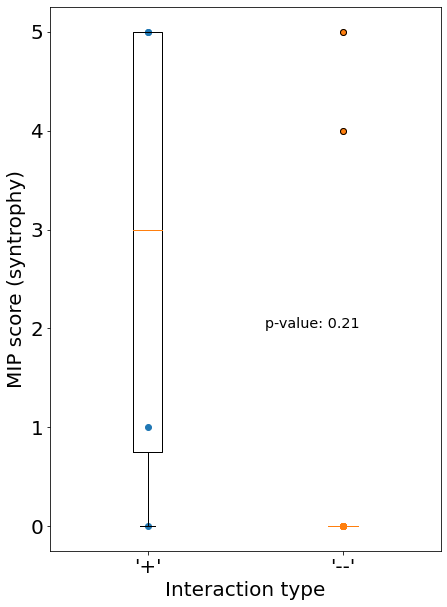

In [23]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("MIP score (syntrophy)")
pyplot.text(1.6,2, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("MIP comparion.jpg")
# display(fig)
# pyplot.show()

## smetana score

In [ ]:
from scipy import stats
posInteractions = [63.57, 47.18, 52.63, 46, 32, 38, 0, 0]
negInteractions = [53, 48.1, 44.76, 45, 0, 0]

ttest = stats.ttest_ind(posInteractions, negInteractions)
print(ttest.pvalue)

In [ ]:
from matplotlib import pyplot
import sigfig

pyplot.rc('axes', titlesize=20, labelsize=20)
pyplot.rc('xtick', labelsize=20)
pyplot.rc('ytick', labelsize=20)
pyplot.rc('legend', fontsize=18)
fig = pyplot.figure(figsize=(7,10))

pyplot.boxplot([posInteractions, negInteractions], labels=["'+'", "'--'"])
pyplot.scatter([1]*len(posInteractions), posInteractions)
pyplot.scatter([2]*len(negInteractions), negInteractions)
pyplot.xlabel("Interaction type")
pyplot.ylabel("smetana score (syntrophy potential)")
pyplot.text(1.6,62, f"p-value: {sigfig.round(ttest.pvalue, sigfigs=3)}", fontsize="x-large")
fig.savefig("smetana comparion.jpg")
# display(fig)
# pyplot.show()